## Integration

In [1]:
import numpy as np
import pandas as pd

In [22]:
import scanpy as sc

### Load Xenium

In [ ]:
xenium_path = "xenium.h5ad"
ad1 = sc.read_h5ad(xenium_path)

In [ ]:
# We subsample as there are 100k single cells.
ad1_sub = sc.pp.subsample(ad1, 0.05, copy=True)

In [ ]:
ad1_sub.obs['clusters'].head()

69163             Immune
34981            DCIS #2
125539           DCIS #2
15793             Immune
99440     Invasive Tumor
Name: clusters, dtype: object

In [25]:
sc.tl.pca(ad1_sub)
sc.pp.neighbors(ad1_sub)
sc.tl.umap(ad1_sub)

/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vec

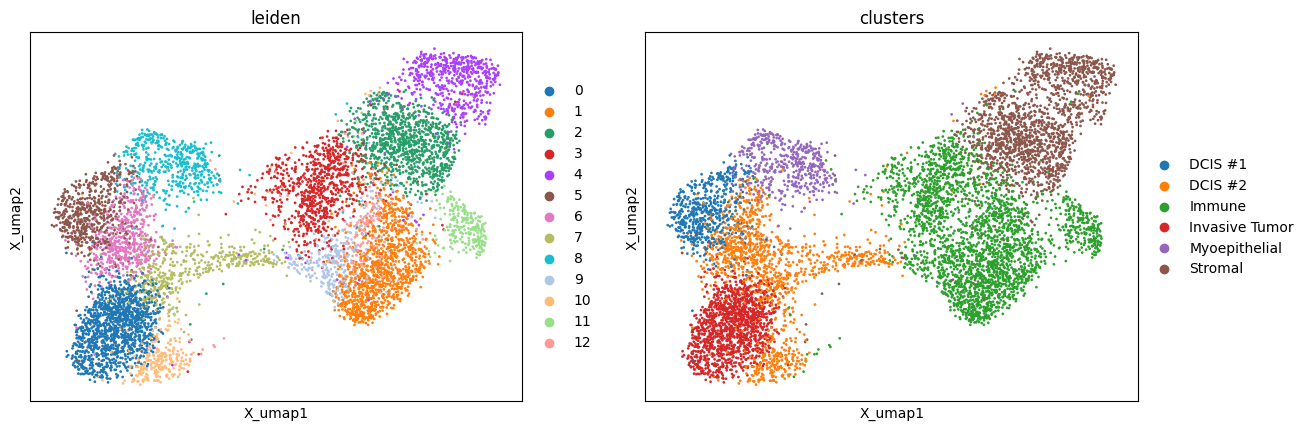

In [29]:
sc.pl.embedding(ad1_sub, basis='X_umap', color=['leiden', 'clusters'])

### Load Thor data

In [23]:
thor_data_path = "fineST_BC_10x_50/fineST_geom1.0_snn0.1_trans1.0_reg_20.h5ad"
ad2 = sc.read_h5ad(thor_data_path)
ad2

AnnData object with n_obs × n_vars = 109307 × 306
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'spot_barcodes', 'x', 'y', 'mean_gray', 'std_gray', 'entropy_img', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'seg_label', 'spot_heterogeneity', 'node_weights'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'used_for_prediction', 'used_for_reduced', 'used_for_vae', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_image_props', 'hvg', 'log1p', 'snn', 'spatial'
    obsm: 'X_pca', 'spatial'
    obsp: 'snn_connectivities', 'snn_knn_connectivities', 'snn_transition_matrix'

In [24]:
ad2_sub = sc.pp.subsample(ad2, 0.05, copy=True)

In [30]:
sc.tl.pca(ad2_sub)
sc.pp.neighbors(ad2_sub, n_neighbors=1000)
sc.tl.umap(ad2_sub)

In [31]:
sc.tl.leiden(ad2_sub)

In [32]:
ad2_sub.obs['clusters'] = ad2_sub.obs['leiden']

/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


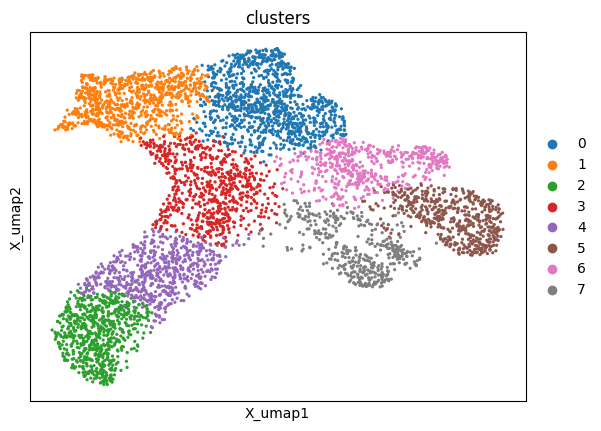

In [33]:
sc.pl.embedding(ad2_sub, basis='X_umap', color=['clusters'])

/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


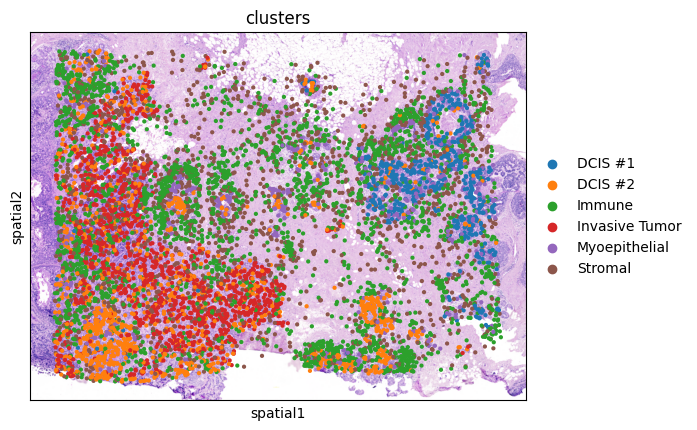

In [34]:
sc.pl.spatial(ad1_sub, color=['clusters'])

/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


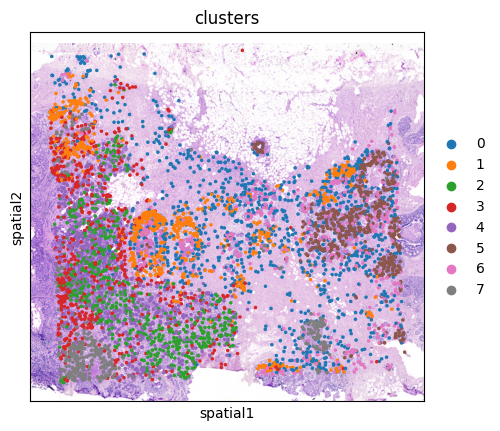

In [35]:
sc.pl.spatial(ad2_sub, color=['clusters'])

In [39]:
def integrate(labelled_ads_dict):
    ad_combined = sc.concat(labelled_ads_dict, label='batch')
    ad_combined.obs_names_make_unique()
    sc.pp.normalize_total(ad_combined)
    sc.pp.scale(ad_combined)
    sc.tl.pca(ad_combined, n_comps=50)
    sc.external.pp.harmony_integrate(ad_combined, key='batch', plot_convergence=True)
    ad_combined.obsm['X_pca_prior'] = ad_combined.obsm['X_pca'].copy()
    ad_combined.obsm['X_pca'] = ad_combined.obsm['X_pca_harmony']
    
    return ad_combined

In [40]:
labelled_adas_dict = {'xenium':ad1_sub, 'thor':ad2_sub}

In [41]:
ad_combined = integrate(labelled_adas_dict)

2025-07-08 13:01:41,415 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-08 13:01:45,645 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-08 13:01:45,674 - harmonypy - INFO - Iteration 1 of 10
2025-07-08 13:01:47,872 - harmonypy - INFO - Iteration 2 of 10
2025-07-08 13:01:50,078 - harmonypy - INFO - Iteration 3 of 10
2025-07-08 13:01:52,285 - harmonypy - INFO - Converged after 3 iterations


In [42]:
sc.pp.neighbors(ad_combined, use_rep='X_pca_harmony', n_neighbors=1000)
sc.tl.umap(ad_combined)

/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/condo/wanglab/tmhpxz9/conda_env/thor.0.1.1/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


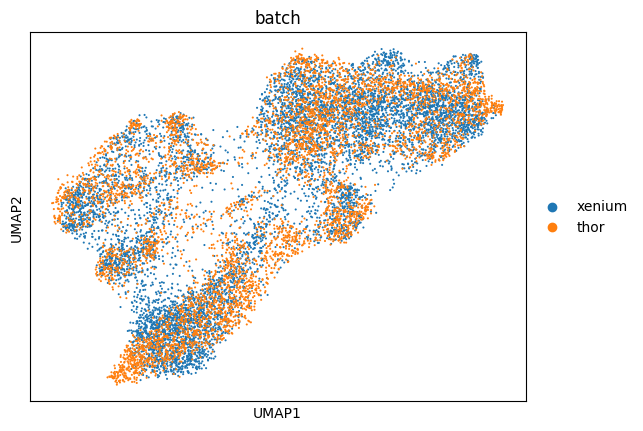

In [43]:
sc.pl.umap(ad_combined, color='batch')

In [56]:
thor_anno = {
    '0':'Stromal',
    '1':'Immune',
    '2':'Invasive Tumor',
    '3':'Immune',
    '4':'DCIS #2',
    '5':'DCIS #1',
    '6':'Myoepithelial',
    '7':'DCIS #2',
}

In [57]:
thor_ann_final = ad_combined[ad_combined.obs.batch == 'thor'].obs['leiden'].map(thor_anno)

In [58]:
thor_ann_final

GGTGTCACCAGCGAAC-1-5      Myoepithelial
CGCCAACCTGGCGAAT-1-24           DCIS #2
TATCCGGAATGAGCGG-1-40            Immune
TGCTTAGCCTGTTGGT-1-2             Immune
GTCCAGCACGTTCAGA-1-54           DCIS #1
                              ...      
TACACTGCGTCCGGAC-1-34           DCIS #2
TCCATGCGTCGGTTAC-1-2            Stromal
ACTGGTTCTGAACGAT-1-39            Immune
GGTAGTGCATGAAGTG-1-14            Immune
TGGAAGCTCCATCGAC-1-17    Invasive Tumor
Name: leiden, Length: 5465, dtype: object

In [59]:
final_anno = pd.concat((ad_combined[ad_combined.obs.batch == 'xenium'].obs['clusters'], thor_ann_final))

In [60]:
ad_combined.obs['clusters'] = final_anno

In [61]:
anno_colors = ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#677deb', '#8c564b']
annos = ['DCIS #1', 'DCIS #2', 'Immune', 'Invasive Tumor', 'Myoepithelial', 'Stromal']

anno_palette = dict(zip(annos, anno_colors))
anno_palette

{'DCIS #1': '#1f77b4',
 'DCIS #2': '#ff7f0e',
 'Immune': '#279e68',
 'Invasive Tumor': '#d62728',
 'Myoepithelial': '#677deb',
 'Stromal': '#8c564b'}

In [62]:
def scatter_plot(embedding, annotations, palette=None, show_legend=False, save_path=None, **kwargs):

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 600
    mpl.rcParams['figure.figsize'] = (2, 2)
    mpl.rcParams['axes.spines.left'] = False
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.bottom'] = False

    if palette is None:
        default_palette = 'tab10'
        palette = dict(zip(set(annotations), plt.cm.get_cmap(default_palette).colors))

    plt.figure()
    for i, label in enumerate(set(annotations)):
        indices = np.where(np.array(annotations) == label)[0]
        color = palette[label]
        plt.scatter(embedding[indices, 0], embedding[indices, 1], label=label, c=color, **kwargs)

    # place the legend outside the plot
    s = kwargs['s']
    
    if show_legend:
        plt.legend(bbox_to_anchor=(1.05, 1), markerscale=5/np.sqrt(s), loc="upper left")

    plt.gca().axis('off')


    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [63]:
batch_palette = {'thor':'#ec5e81',
                 'xenium':'#73b97d',
                }

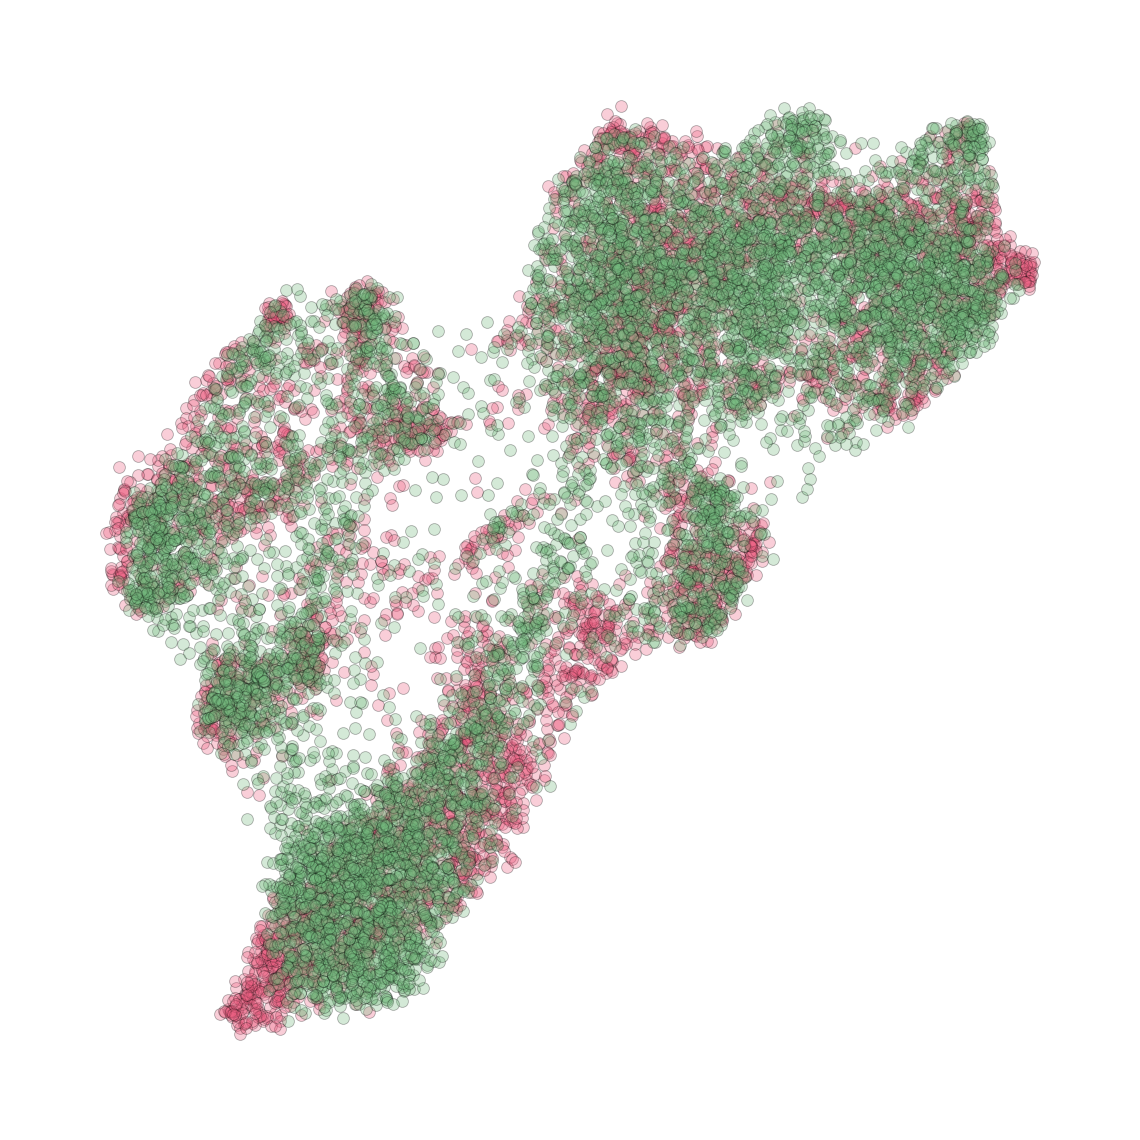

In [64]:
scatter_plot(
    ad_combined.obsm['X_umap'],
    ad_combined.obs.batch,
    s=2,
    ec='k',
    linewidth=0.1,
    show_legend=False,
    alpha=0.3,
    palette=batch_palette)

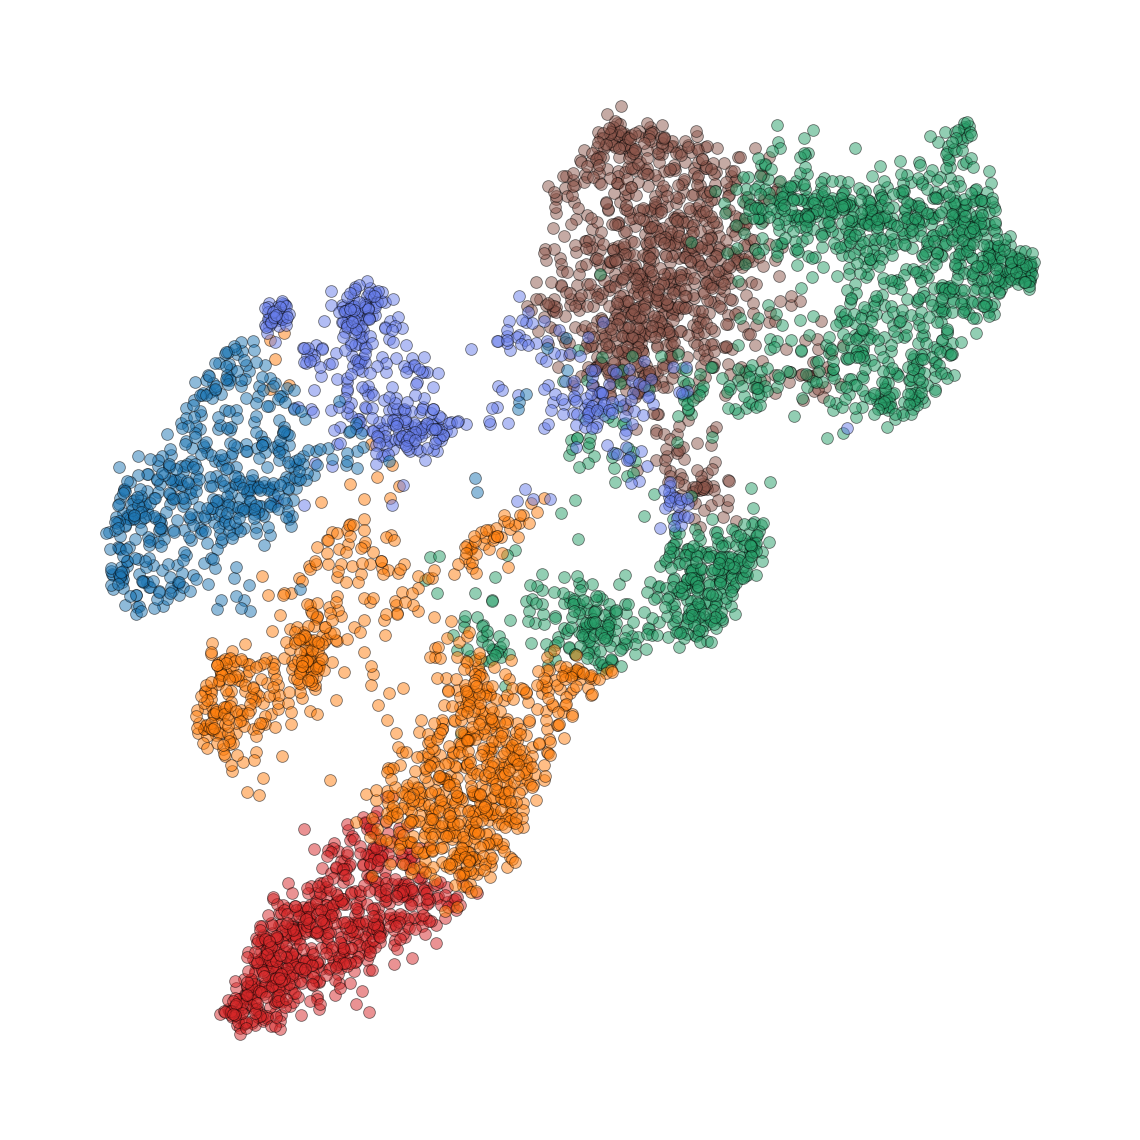

In [65]:
scatter_plot(
    ad_combined[ad_combined.obs.batch == 'thor'].obsm['X_umap'],
    ad_combined[ad_combined.obs.batch == 'thor'].obs.clusters,
    s=2,
    ec='k',
    linewidth=0.1,
    alpha=0.5,
    palette=anno_palette)

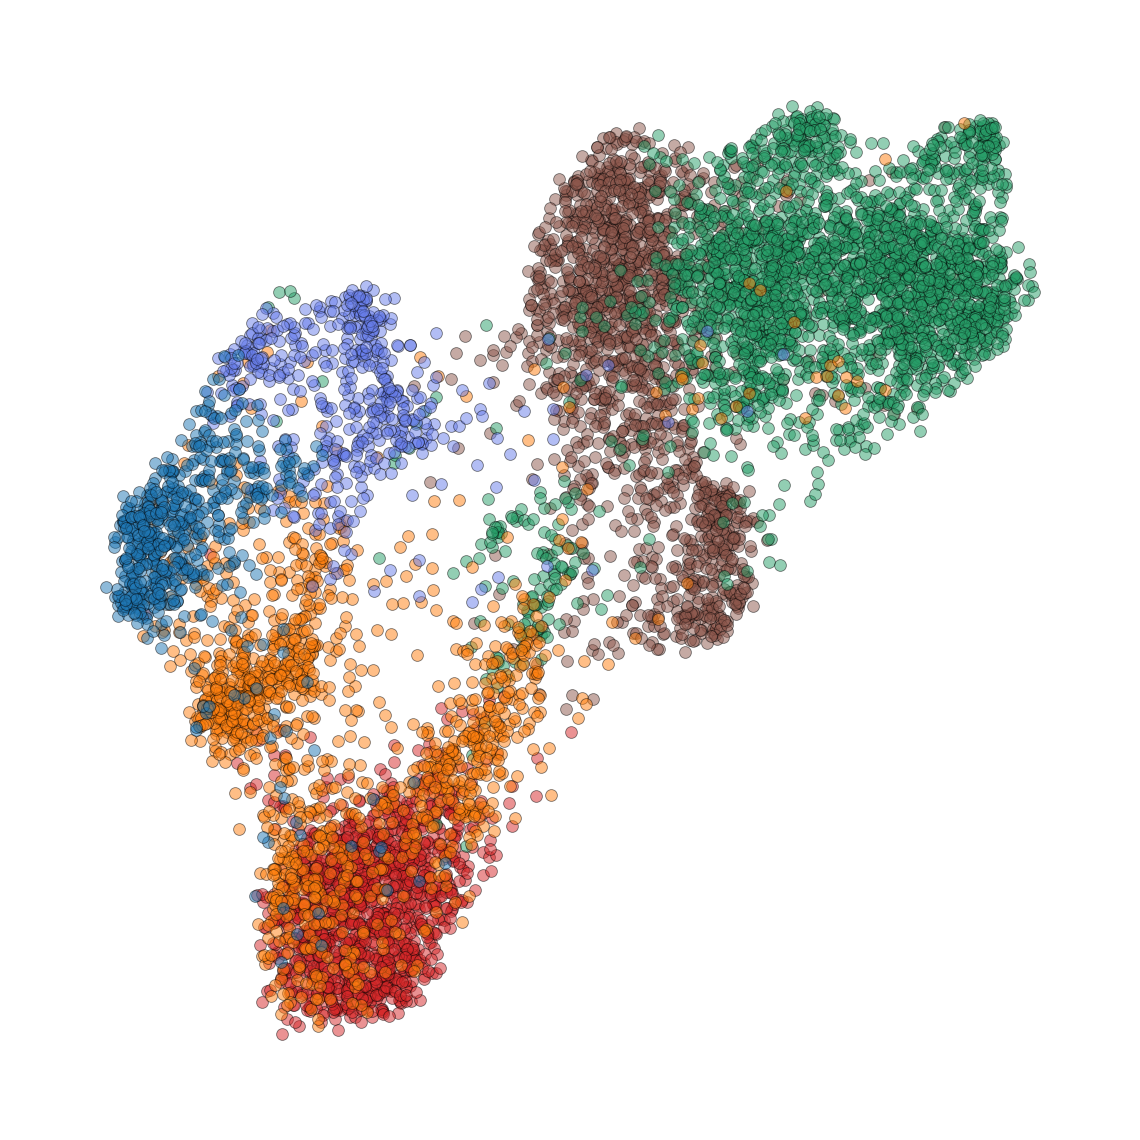

In [66]:
scatter_plot(
    ad_combined[ad_combined.obs.batch == 'xenium'].obsm['X_umap'],
    ad_combined[ad_combined.obs.batch == 'xenium'].obs.clusters,
    s=2,
    ec='k',
    linewidth=0.1,
    alpha=0.5,
    palette=anno_palette)

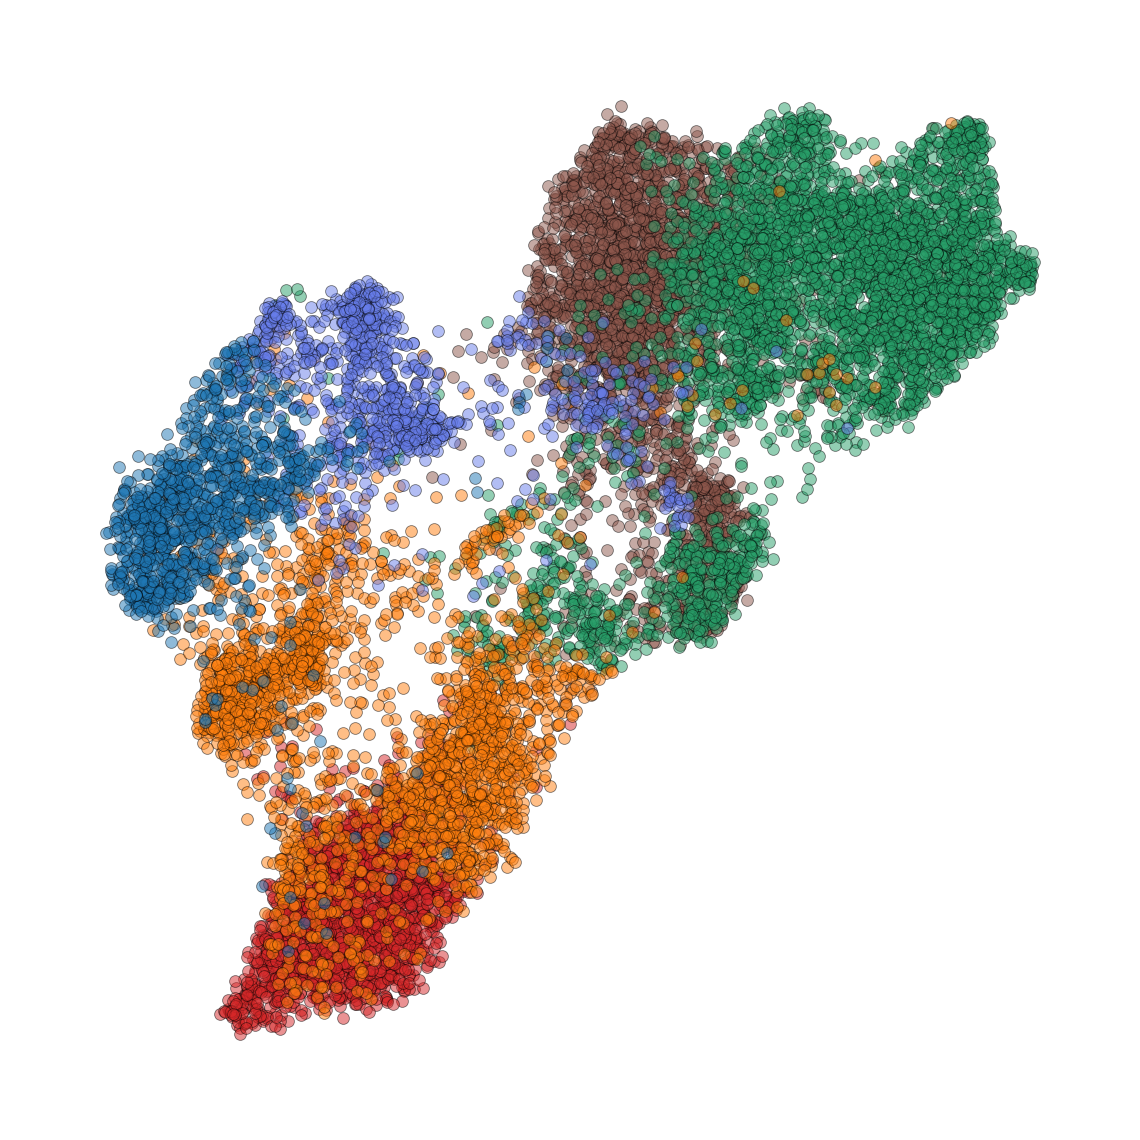

In [67]:
scatter_plot(
    ad_combined.obsm['X_umap'],
    ad_combined.obs.clusters,
    s=2,
    ec='k',
    linewidth=0.1,
    alpha=0.5,
    palette=anno_palette)